In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns
import pandas as pd 
import warnings
warnings.filterwarnings("ignore")


In [2]:
def marcenko_pastur(T, N):
    """
    Compute the bounds and density of the Marcenko-Pastur distribution for a random matrix.

    Parameters:
    T (int): Number of samples.
    N (int): Number of features.

    Returns:
    tuple: (lambda_min, lambda_max), the bounds of the Marcenko-Pastur distribution.
    function: rho(x), the density function of the Marcenko-Pastur distribution.
    """
    q = N / float(T)
    lambda_min = (1 - np.sqrt(q))**2
    lambda_max = (1 + np.sqrt(q))**2

    def rho(x):
        ret = np.sqrt((lambda_max - x) * (x - lambda_min)) / (2 * np.pi * q * x)
        if q <= 1:
            return ret if lambda_min < x < lambda_max else 0.0
        return 1 - 1 / q if x == 0 else (ret if lambda_min < x < lambda_max else 0.0)

    return (lambda_min, lambda_max), rho


In [3]:
def compute_m3(X, norm_cdf):
    """
    Corresponds to the matrix denoted H in the paper.
    """

    T, N = X.shape
    T_aug = int(T * (T-1) / 2)
    X_aug = np.zeros((T_aug, N))
    compt = 0
    for i in range(T-1):
        for j in range(i+1, T):
            X_aug[compt] = np.sign(X[i] - X[j]) - 2 * norm_cdf[i] + 2 * norm_cdf[j]
            compt += 1 
    A_ij = 1/T_aug * X_aug.T @ X_aug
    return A_ij

# Figure 1 

gamma =  17.5
q =  0.5072463768115942


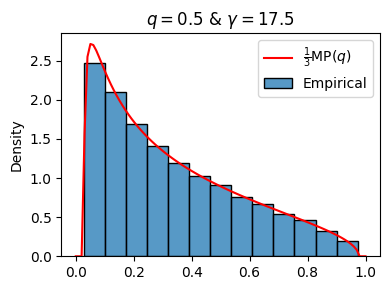

In [4]:
plt.figure(figsize=(4,3))
m = 4
T = 70
N = int(T**2/m)
np.random.seed(42)
X = np.random.randn(T, N)
norm_cdf = norm.cdf(X)
T_aug = int(T * (T-1) / 2)
_, func_mp = marcenko_pastur(T_aug, N)
xs = np.linspace(0, 1, 100)
mp_y = 3 * np.array([func_mp(3*x) for x in xs])
print("gamma = ", N/T)
print("q = ", N/T_aug)


plt.plot(xs, mp_y, label=r'$\frac{1}{3}$MP($q$)', color='red')
eigvals_A_ij = np.linalg.eigvalsh(compute_m3(X, norm_cdf))
sns.histplot(eigvals_A_ij, stat='density', bins=13, label='Empirical')
plt.title(r'$q=0.5$ & $\gamma=17.5$')
plt.legend()
plt.tight_layout()

# Figure 2 

gamma =  5.714285714285714
q =  0.16563146997929606


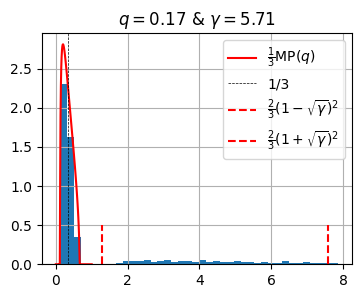

In [6]:
plt.figure(figsize=(4,3))
 
N = 400 # 300, 500, 600 
T = 70
T_aug = int(T * (T-1) / 2)

_, func_mp = marcenko_pastur(T_aug, N)
xs = np.linspace(0,1, 100)
mp_y = 3 * np.array([func_mp(3*x) for x in xs])
gamma = N/T
q = N/T_aug
print("gamma = ", gamma)
print("q = ", q)


plt.plot(xs, mp_y, label=r'$\frac{1}{3}$MP($q$)', color='red')
plt.title(rf'$q={np.round(q,2)}$ & $\gamma={np.round(gamma,2)}$')
np.random.seed(42)
evals = pd.Series(
    np.linalg.eigvalsh(pd.DataFrame(np.random.randn(T, N)).corr(method="kendall"))
)
evals.hist(bins=40, density=True)
plt.axvline(1 / 3, ls="dashed", color="black", label="1/3", linewidth=0.5)
plt.plot([0.66*(1-np.sqrt(gamma))**2] * 2, [0,0.5], ls="dashed", color="red", label=r'$\frac{2}{3}(1-\sqrt{\gamma})^2$');
plt.plot([0.66*(1+np.sqrt(gamma))**2] * 2, [0,0.5], ls="dashed", color="red", label=r'$\frac{2}{3}(1+\sqrt{\gamma})^2$');
plt.legend();